### kaggle의 타이타닉 데이터 이용
https://www.kaggle.com/c/titanic

In [3]:
!pip install missingno

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 일일이 그래프의 폰트사이즈 지정없이 시본의 폰트사이즈 사용
plt.style.use("seaborn")
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.


2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.


3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.


4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.


5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.


6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는지 확인해봅니다.

#    1. Dataset 확인   

In [6]:
df_train=pd.read_csv("C:\\Users\\cloud\\Anaconda_src\\data\\titanic\\train.csv")
df_test=pd.read_csv("C:\\Users\\cloud\\Anaconda_src\\data\\titanic\\test.csv")

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# NULL DATA CHECK

In [13]:
for col in df_train.columns:
    msg="column : {:>10}\t percent of NaN value : {:.2f}%".format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : PassengerId	 percent of NaN value : 0.00%
column :   Survived	 percent of NaN value : 0.00%
column :     Pclass	 percent of NaN value : 0.00%
column :       Name	 percent of NaN value : 0.00%
column :        Sex	 percent of NaN value : 0.00%
column :        Age	 percent of NaN value : 19.87%
column :      SibSp	 percent of NaN value : 0.00%
column :      Parch	 percent of NaN value : 0.00%
column :     Ticket	 percent of NaN value : 0.00%
column :       Fare	 percent of NaN value : 0.00%
column :      Cabin	 percent of NaN value : 77.10%
column :   Embarked	 percent of NaN value : 0.22%


[Train Data]

Age 19.87%

Cabin 77.10%

Embarked 0.22%

They are Null Values

In [14]:
for col in df_test.columns:
    msg="column : {:>10}\t percent of NaN value : {:.2f}%".format(col, 100*(df_test[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : PassengerId	 percent of NaN value : 0.00%
column :     Pclass	 percent of NaN value : 0.00%
column :       Name	 percent of NaN value : 0.00%
column :        Sex	 percent of NaN value : 0.00%
column :        Age	 percent of NaN value : 9.65%
column :      SibSp	 percent of NaN value : 0.00%
column :      Parch	 percent of NaN value : 0.00%
column :     Ticket	 percent of NaN value : 0.00%
column :       Fare	 percent of NaN value : 0.11%
column :      Cabin	 percent of NaN value : 36.70%
column :   Embarked	 percent of NaN value : 0.00%


[Test Data]

Age 9.65%

Fare 0.11%

Cabin 36.70%

They are Null Values

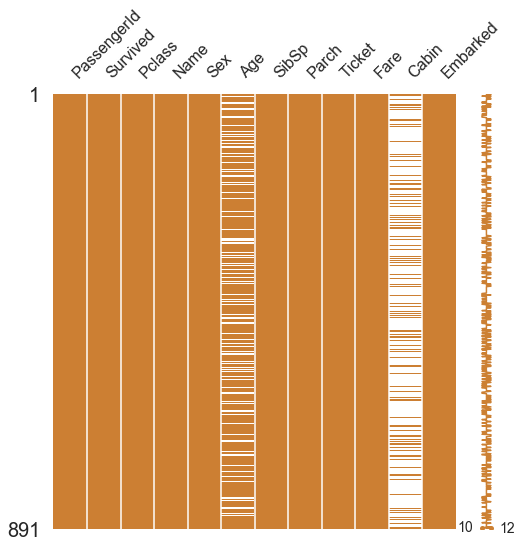

In [18]:
#import missingno as msno
# msno 라이브러리로 Null values를 시각화

msno.matrix(df=df_train.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))


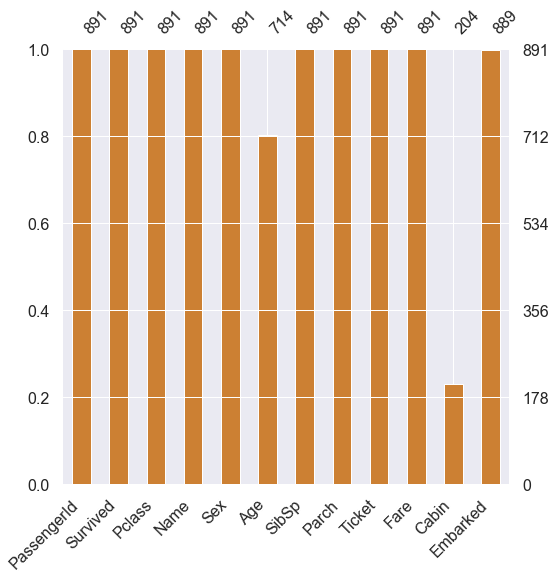

In [19]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

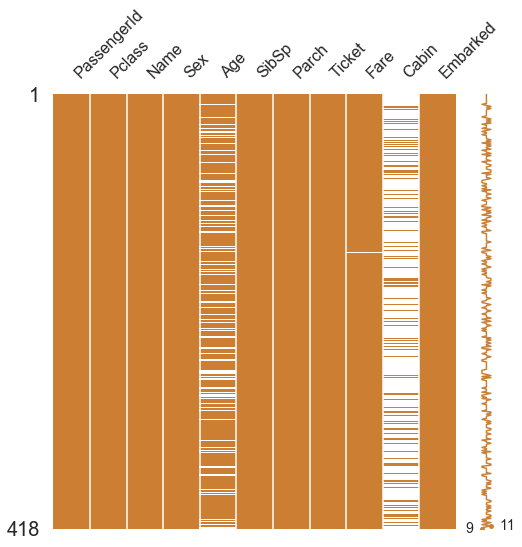

In [16]:
msno.matrix(df=df_test.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

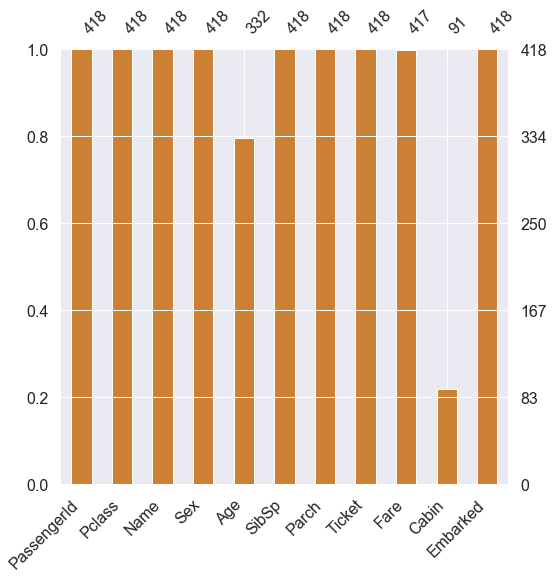

In [20]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

## Target Label Check

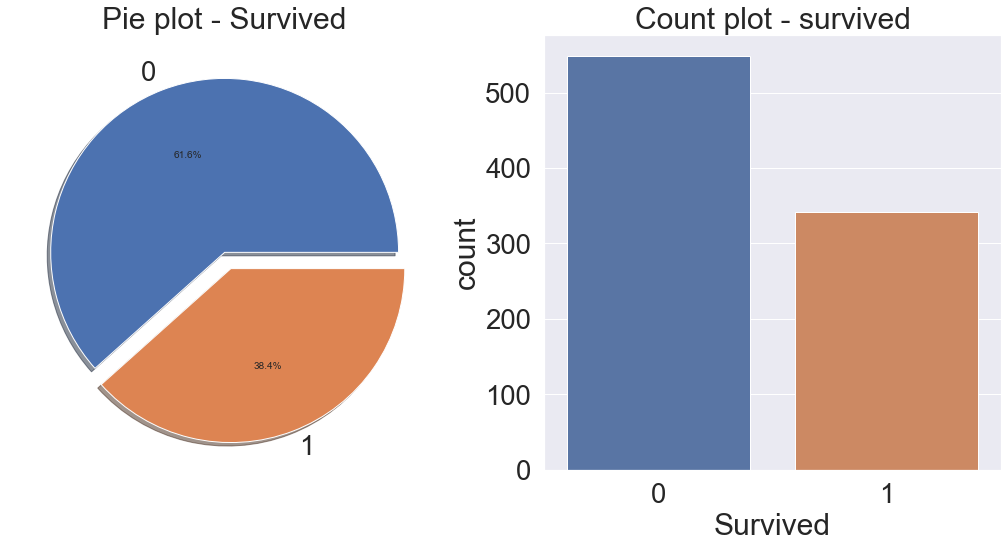

In [21]:
#타겟이 어떤 분포를 가지는지 확인

f,ax = plt.subplots(1,2,figsize=(18,8))

df_train["Survived"].value_counts().plot.pie(explode=[0,0.1]
                                             ,autopct='%1.1f%%',
                                            ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel("")

sns.countplot("Survived",data=df_train,ax=ax[1])
ax[1].set_title("Count plot - survived")

plt.show()

## 2. Exploratory data analysis

(1) Pclass

In [24]:
df_train[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [25]:
df_train[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [26]:
#pandas 의 crosstab 을 사용

pd.crosstab(df_train["Pclass"],df_train["Survived"],
            margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### 보기에는 가장 낮은 클래스가 생존수가 높지만 

### 인원수가 다르므로 각 클래스별 생존률을 알아보자

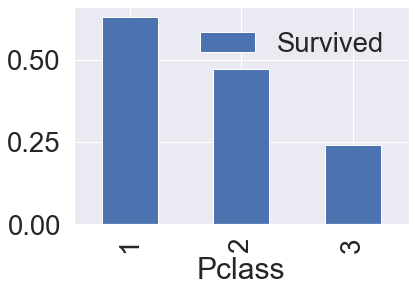

In [29]:
df_train[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean().sort_values(by="Survived",
                                                                                   ascending=False).plot.bar()

In [30]:
df_train[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean().sort_values(by="Survived",
                                                                                   ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 생존률은 클래스가 높을 수록 좋다

--------------------------------------------------------------------------









(2) Sex

In [31]:
df_train[["Sex","Survived"]].groupby(["Sex"],as_index=True).mean().sort_values(by="Survived",
                                                                                   ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


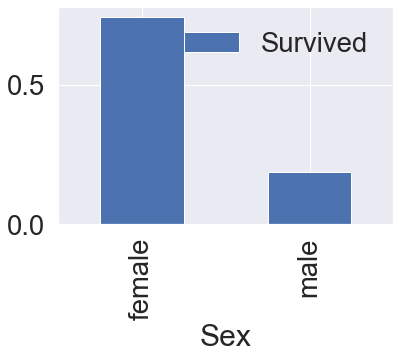

In [32]:
df_train[["Sex","Survived"]].groupby(["Sex"],as_index=True).mean().sort_values(by="Survived",
                                                                                   ascending=False).plot.bar()

### 여성이 남성보다 생존률이 높다

## 성별과 Pclass를 모두 생각하면 어떻게 나올까?

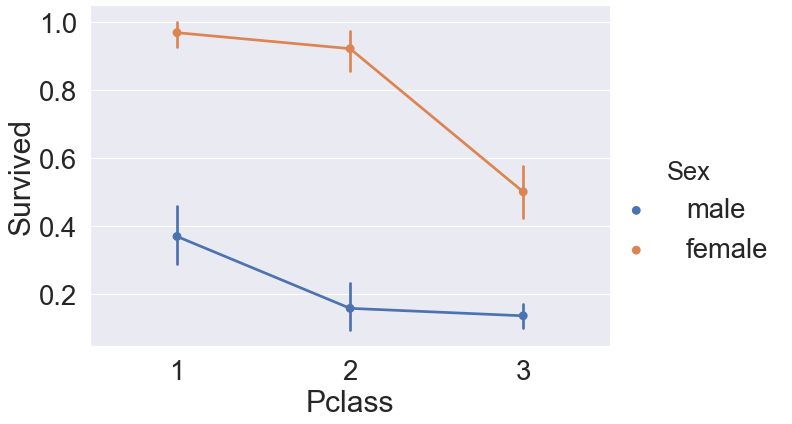

In [33]:
sns.factorplot("Pclass","Survived",hue="Sex",
               data=df_train, size=6, aspect=1.5)

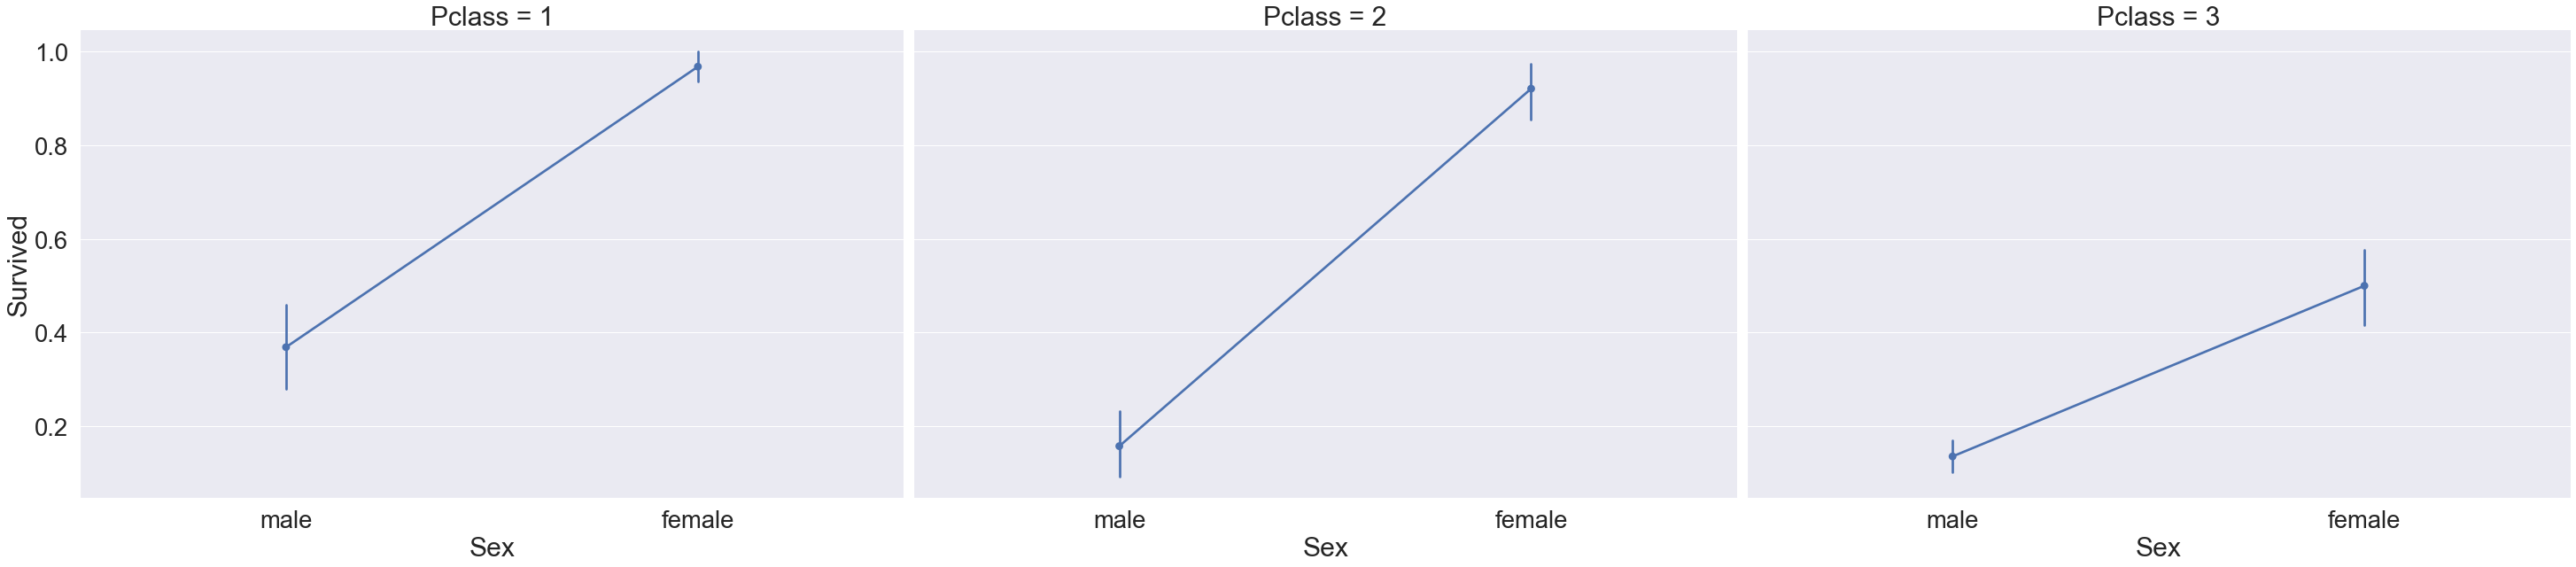

In [35]:
sns.factorplot("Sex","Survived",col="Pclass",
               data=df_train, satureation=.5,  size=9, aspect=1.5)

(3) Age


Age는 Null values가 존재했다.

In [36]:
#연령대 살펴보기

print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


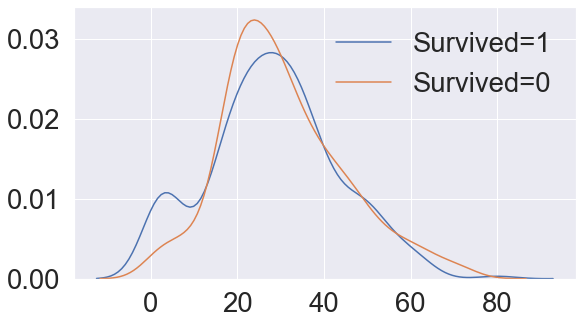

In [37]:
#히스토그램으로 살펴보기

fig, ax = plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[df_train["Survived"]==1]["Age"],ax=ax)
sns.kdeplot(df_train[df_train["Survived"]==0]["Age"],ax=ax)

plt.legend(["Survived=1","Survived=0"])
plt.show()

차이를 보니 어릴수록 생존률이 높군

정확하게 봐볼까?

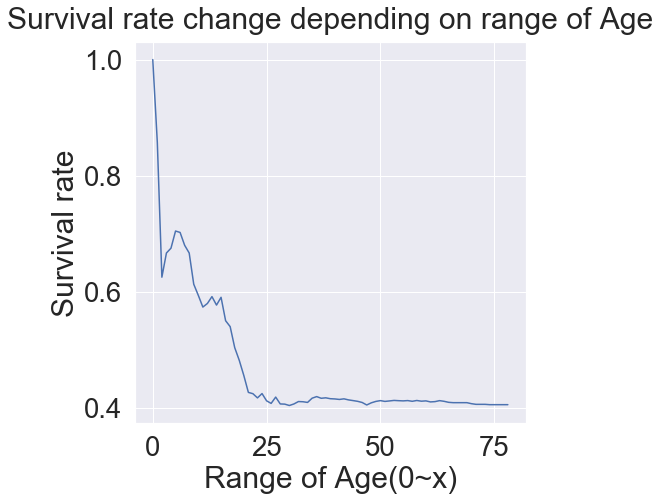

In [40]:
cummulate_survival_ratio=[]

for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train["Age"]<i]["Survived"].sum()/
                                                                               len(df_train[df_train["Age"]<i]["Survived"]))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

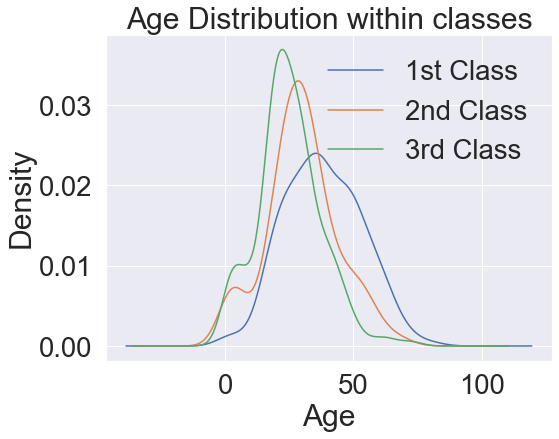

In [39]:
# Age & Pclass
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

고연령층이 높은 class에 앉은 경우가 높다

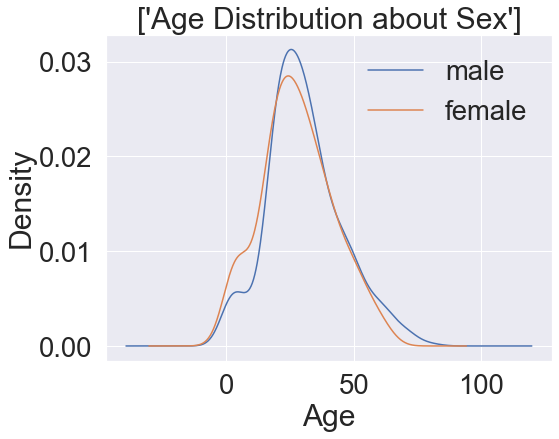

In [42]:
# Age & Sex
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Sex'] =="male"].plot(kind='kde')
df_train['Age'][df_train['Sex'] == "female"].plot(kind='kde')


plt.xlabel('Age')
plt.title(["Age Distribution about Sex"])
plt.legend(['male','female'])

성별 나이의 차이는 크게 없군

(4) Embarked

In [44]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'],
                                           as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


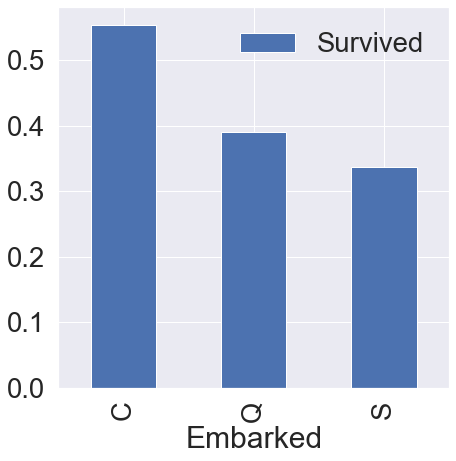

In [45]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'],
                                           as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

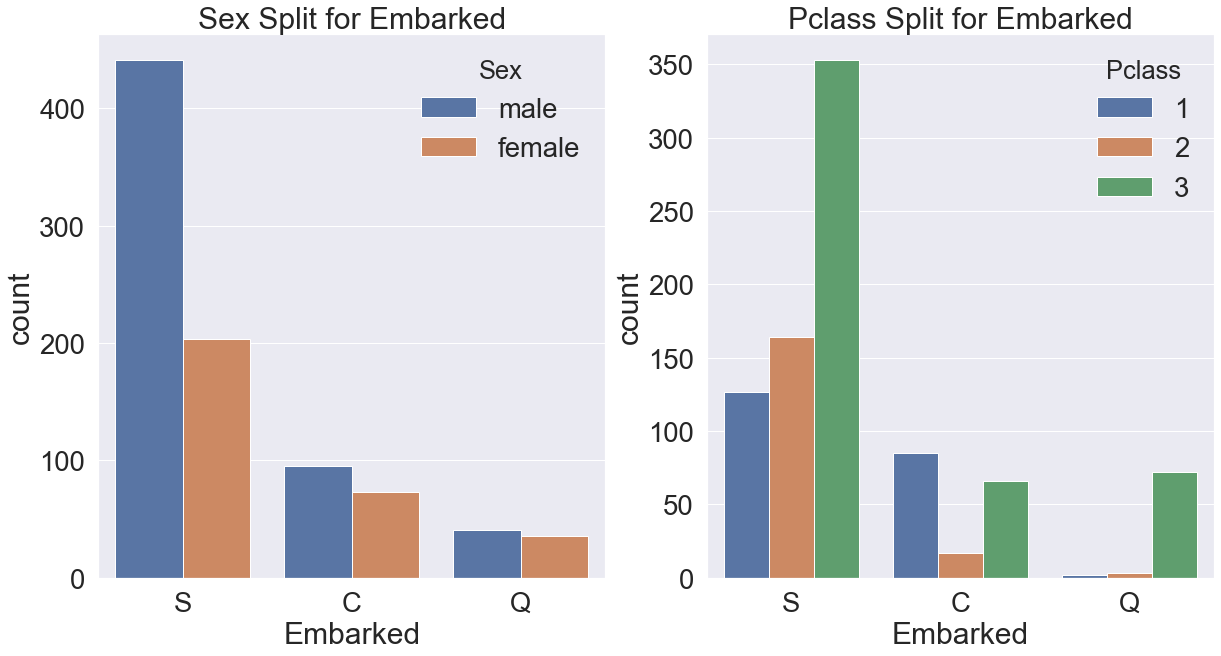

In [59]:
f, ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot("Embarked",hue="Sex",data=df_train, ax=ax[0])
ax[0].set_title("Sex Split for Embarked" )

sns.countplot("Embarked",hue="Pclass",data=df_train,ax=ax[1])
ax[1].set_title("Pclass Split for Embarked")

plt.show()

개별적으로는 C항구가 생존률이 높았는데 

S항구에는 남성의 비율이 높았고 Pclass가 낮은 사람들이 많이 탔다.

C항구는 Pclass가 낮은 사람보다 가장 높은 사람들이 더 많이 탔다.

(5)  Family   (SibSp  +  Parch)

In [61]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1 

In [62]:
df_train["Family"].max()

11

In [63]:
df_train["Family"].min()

1

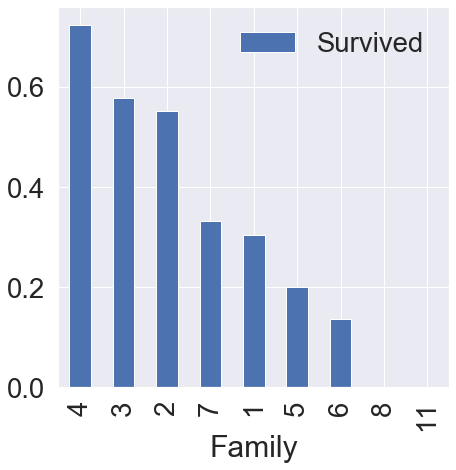

In [64]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Family', 'Survived']].groupby(['Family'],
                                           as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

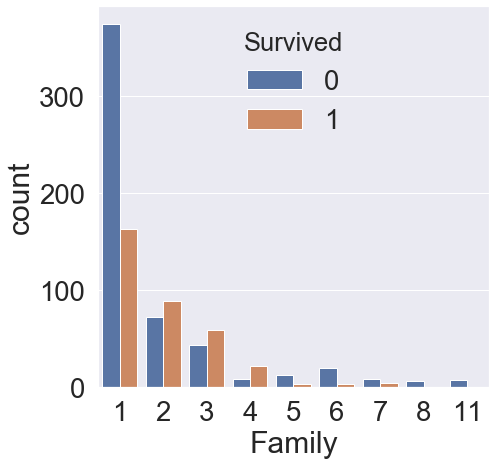

In [65]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.countplot("Family",hue="Survived",data=df_train,ax=ax)

혼자 탑승한 승객이 많았지만 가장 많이 살아남은 가족수는 4명인 곳이군.

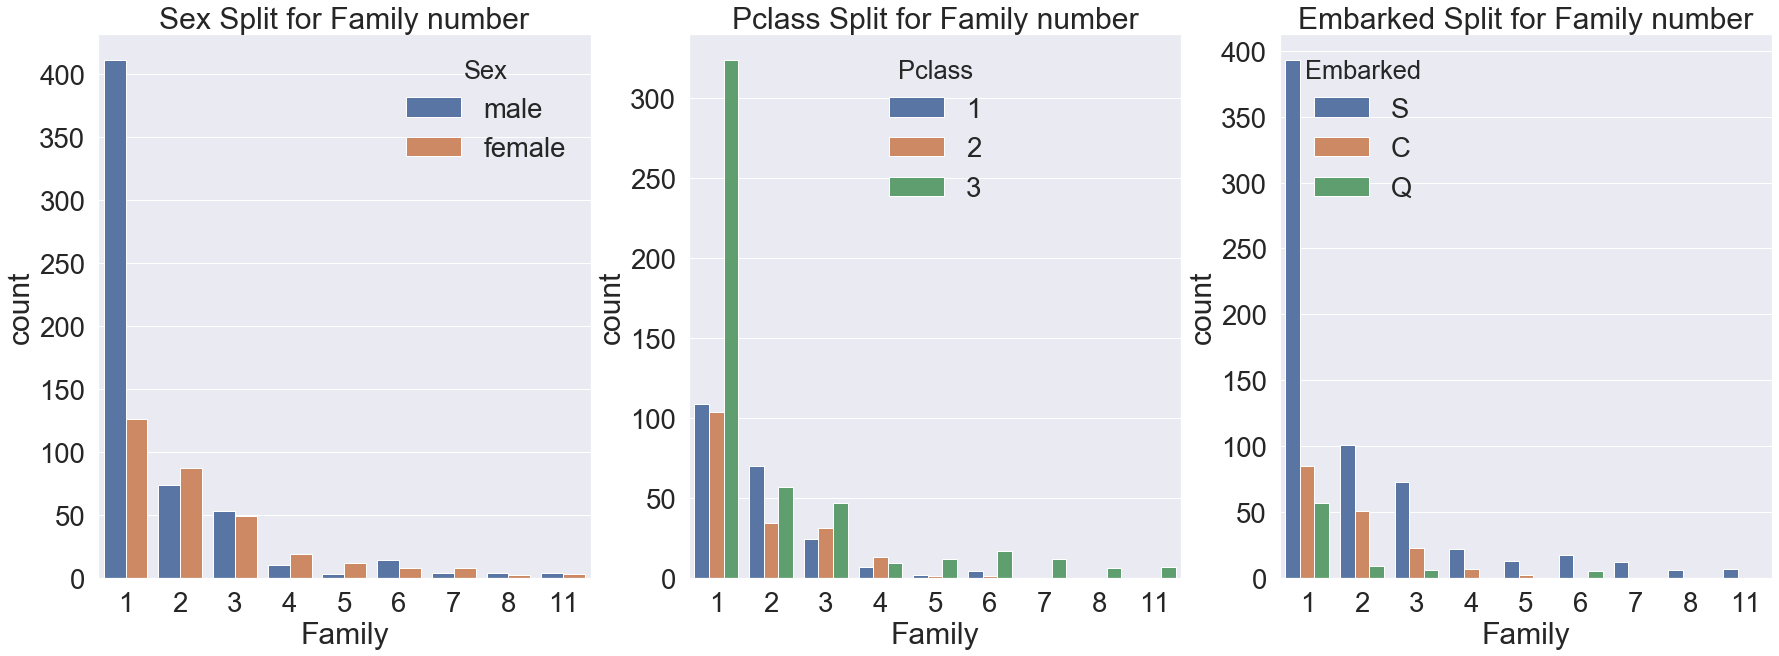

In [66]:
f, ax=plt.subplots(1,3,figsize=(30,10))

sns.countplot("Family",hue="Sex",data=df_train, ax=ax[0])
ax[0].set_title("Sex Split for Family number" )

sns.countplot("Family",hue="Pclass",data=df_train,ax=ax[1])
ax[1].set_title("Pclass Split for Family number")


sns.countplot("Family",hue="Embarked",data=df_train,ax=ax[2])
ax[2].set_title("Embarked Split for Family number")

plt.show()

가족과 한명도 탑승하지 않은 승객은 남자이거나

Pclass가 낮거나 S항구인 경우가 많다.

(6) Fare

In [68]:
df_train["Fare"].max()

512.3292

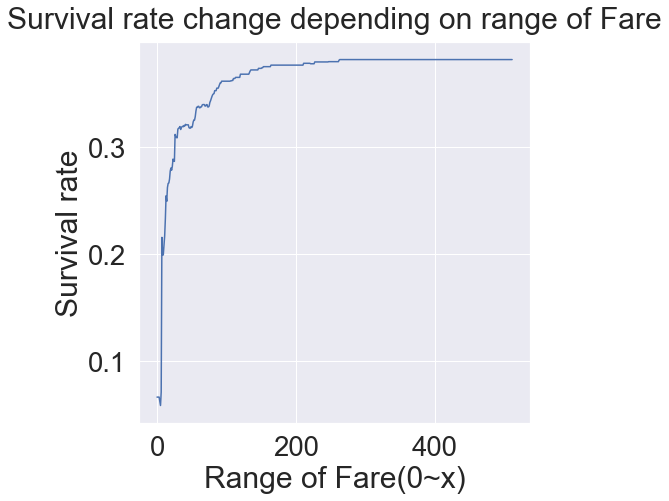

In [69]:
cummulate_survival_ratio=[]

for i in range(1,513):
    cummulate_survival_ratio.append(df_train[df_train["Fare"]<i]["Survived"].sum()/
                                                                               len(df_train[df_train["Fare"]<i]["Survived"]))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Fare', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Fare(0~x)')
plt.show()

탑승요금이 비쌀수록 살아남을 확률이 크군 

(7) Ticket

In [70]:
df_train['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
CA 2144              6
347088               6
3101295              6
S.O.C. 14879         5
382652               5
PC 17757             4
349909               4
W./C. 6608           4
2666                 4
19950                4
113781               4
LINE                 4
347077               4
113760               4
4133                 4
17421                4
347742               3
PC 17582             3
PC 17572             3
110152               3
35273                3
24160                3
F.C.C. 13529         3
363291               3
239853               3
PC 17755             3
29106                3
                    ..
347464               1
315082               1
SC/Paris 2163        1
218629               1
113028               1
370377               1
347073               1
348124               1
PC 17474             1
26707                1
239854               1
PC 17595             1
349227     

다양한 티켓

유용한 데이터 같지 않으므로 패스!


Cabin은 결측치가 너무 크니까 우선 패스!

# 3. Feature engineering

[Train Data]

Age 19.87%

Cabin 77.10%

Embarked 0.22%

They are Null Values

[Test Data]

Age 9.65%

Fare 0.11%

Cabin 36.70%

They are Null Values

### 결측치 채우기

(1) Age

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


이름에 보면 성별, 미혼인지 기혼인지, 어린아이인지 어른인지 판단할 데이터 존재

In [77]:
#그 힌트를 Initial이라는 데이터셋으로 만들어 보기

df_train["Initial"]=df_train.Name.str.extract("([A-Za-z]+)\.")
df_test["Initial"]=df_test.Name.str.extract("([A-Za-z]+)\.")

In [78]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')
#Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [80]:
pd.crosstab(df_test['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')
#Checking the Initials with the Sex

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,0,1,6,26,95,31,1,0
male,2,1,0,15,52,145,41,0,2


대체로 무엇이 남자고 여자를 의미하는지 알 수 있다

이름을 통해 알 수 있는 성별 특징을 

Master,Miss, Mrs, Mr로 나눠준다

In [81]:
df_train["Initial"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [88]:
df_train["Initial"].replace(['Don', 'Rev', 'Dr', 'Mme',"Ms",
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Jonkheer'],
                            ["Mr","Mr","Mr","Mrs","Miss","Mr","Miss","Mr","Miss","Mr","Mr","Mrs","Mr"],inplace=True)

In [89]:
df_test["Initial"].replace(['Don', 'Rev', 'Dr', 'Mme',"Ms",
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Jonkheer'],
                            ["Mr","Mr","Mr","Mrs","Miss","Mr","Miss","Mr","Miss","Mr","Mr","Mrs","Mr"],inplace=True)

In [90]:
df_train.groupby('Initial').describe()

PassengerId                                                      \
              count        mean         std  min     25%    50%     75%   
Initial                                                                   
Master         40.0  414.975000  301.717518  8.0  165.75  345.0  764.00   
Miss          186.0  412.747312  245.924677  3.0  216.25  389.0  615.25   
Mr            538.0  457.697026  254.154946  1.0  228.25  468.5  675.75   
Mrs           127.0  454.921260  270.088451  2.0  255.50  438.0  690.00   

               Survived            ...       Fare           Family            \
           max    count      mean  ...        75%       max  count      mean   
Initial                            ...                                         
Master   870.0     40.0  0.575000  ...  39.171875  151.5500   40.0  4.675000   
Miss     889.0    186.0  0.704301  ...  45.569800  512.3292  186.0  2.241935   
Mr       891.0    538.0  0.161710  ...  26.509375  512.3292  538.0  1.440520   
Mrs      886.0    127.0  0.795276  ...  58.689600  247.5208  127.0  2.503937   

                                             
              std  min  25%  50%  75%   max  
Initial                                      
Master   2.092569  2.0  3.0  4.0  6.0  11.0  
Miss     1.983871  1.0  1.0  1.0  3.0  11.0  
Mr       1.140581  1.0  1.0  1.0  1.0  11.0  
Mrs      1.350332  1.0  2.0  2.0  3.0   8.0  

[4 rows x 64 columns]

In [91]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,4.675000
Miss,412.747312,0.704301,2.284946,22.020000,0.704301,0.537634,43.777511,2.241935
Mr,457.697026,0.161710,2.369888,33.022727,0.289963,0.150558,24.842176,1.440520
Mrs,454.921260,0.795276,1.984252,35.763636,0.685039,0.818898,45.654461,2.503937


나이 결측치를 채울 때

Master=5

Miss =22

Mr   =33

Mrs  =36

In [92]:
#결측치 채우기

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22


df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22

(2) Embarked(train)  &  Fare(test)

In [95]:
df_train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [97]:
df_test["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

Embarked나 Fare 같은 경우 결측치 수가 적으므로 가장 큰 수를 대입

In [100]:
df_train["Embarked"].fillna("S",inplace=True)
df_test["Fare"].fillna(512.3292,inplace=True)

(3)  Cabin

Cabin은 결측치 수가 너무 많으므로 아에 사용 안할 것임.

In [101]:
#check the Null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Family         891 non-null int64
Initial        891 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ KB


In [102]:
#Drop the columns

df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
Family      891 non-null int64
Initial     891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


히트맵으로 상관관계를 알아보자.

히트맵으로 표현하기 위해 정수형 혹은 실수형이 아닌 데이터를 변환

data['데이터 셋'].map({"데이터":int 혹은 float})

In [107]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mrs': 2, 'Mr': 3})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mrs': 2, 'Mr': 3})

In [108]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [109]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

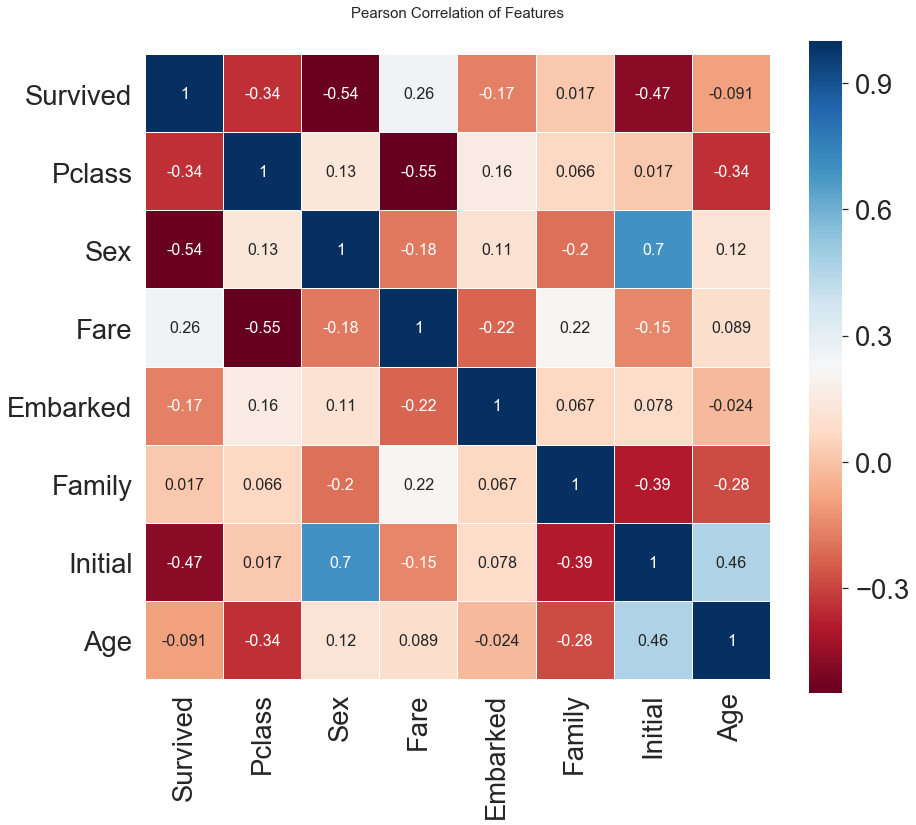

In [110]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family', 'Initial', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

### 상관관계가 있는 요소

Pclass & Sex

Pclass & Embarked

Sex & Embarked

Pclass & Family

Fare & Family

Embarked & Family

Sex & Initial

Embarked & Initial

Sex & Age

Fare & Age

Initial & Age
